In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager
font = font_manager.FontProperties(fname=r"C:\\Windows\\Fonts\\msyh.ttc",size=20)

## 绘制散点图

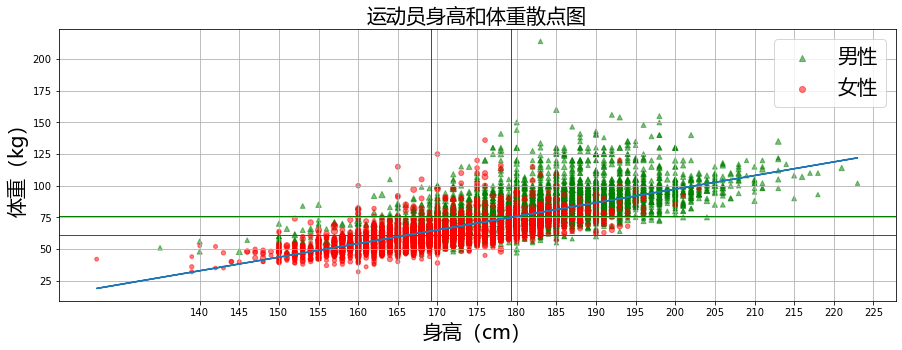

In [35]:
# ==============数据处理部分==============
athletes = pd.read_csv('new_athlete.csv').dropna()
# athletes
male_athletes = athletes[athletes['Sex']=='M']
male_mean_height = male_athletes['Height'].mean()
male_mean_weight = male_athletes['Weight'].mean()

female_athletes = athletes[athletes['Sex']=='F']
female_mean_height = female_athletes['Height'].mean()
female_mean_weight = female_athletes['Weight'].mean()

# =============数据可视化部分=============
# -----绘图-------
plt.figure(figsize=(15,5))
plt.scatter(male_athletes['Height'],male_athletes['Weight'],s=male_athletes['Age'],marker='^',color='g',label='男性',alpha=0.5)
plt.scatter(female_athletes['Height'],female_athletes['Weight'],s=female_athletes['Age'],marker='o',color='r',label='女性',alpha=0.5)

plt.axvline(male_mean_height,color='g',linewidth=1)
plt.axhline(male_mean_weight,color='g',linewidth=1)
plt.axvline(female_mean_height,color='r',linewidth=1)
plt.axhline(female_mean_weight,color='r',linewidth=1)
# -----显示调整-----
plt.xticks(np.arange(140,230,5))
plt.legend(prop=font)
plt.xlabel("身高（cm）",fontproperties=font)
plt.ylabel("体重（kg）",fontproperties=font)
plt.title("运动员身高和体重散点图",fontproperties=font)


# =============生成回归曲线================
from sklearn.linear_model import LinearRegression
xtrain = athletes['Height']
ytrain = athletes['Weight']
# 生成线性回归对象
model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
# 喂养训练数据，但是需要把因变量转换成列向量（行向量不好使）
line_xticks = xtrain
line_yticks = model.predict(xtrain[:,np.newaxis])
plt.plot(line_xticks, line_yticks)


plt.grid()
plt.show()